# Notion

This notebook is the modified notebook of [AtomisticSimulationTutorial](https://docs.matlantis.com/atomistic-simulation-tutorial/en/) to run on Google Colab. We only provide executable parts with general library.

# ASE Basics

The Atomic Simulation Environment (ASE) is a useful OSS library for advancing atomistic simulations in Python. <br/>
In this section, we will introduce the basic usage of ASE.

 - Documentation: https://wiki.fysik.dtu.dk/ase/
 - gitlab: https://gitlab.com/ase/ase

## Initial setup

In [1]:
!pip install ase==3.23.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.5 MB/s eta 0:00:00


In [2]:
import os

from IPython.display import HTML, Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation

from ase import Atoms
from ase.build import make_supercell
from ase.io import write
from ase.visualize import view

os.makedirs("output", exist_ok=True)

def view_x3d(atoms, idx=0):
    if isinstance(atoms[0], Atoms):
        # Assume this is a trajectory or struct list
        if (len(atoms) <= idx):
                print(f"The specified index exceeds the length of the trajectory. The length of the trajectory is {len(atoms)}.")
        return view(atoms[idx], viewer="x3d")
    else:
        return view(atoms, viewer="x3d")


def view_ase_atoms(atoms, rotation="0x,0y,0z", figsize=(4, 4), title="", scale=100):
    fig, ax = plt.subplots(figsize=figsize)
    write("output/tmp.png", atoms, rotation=rotation, scale=scale)
    img = mpimg.imread('output/tmp.png')
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
    plt.show()
    os.remove('output/tmp.png')
    return

def traj_to_apng(traj, rotation='30x,30y,30z'):
    imgs = []
    for atom in traj:
        supercell = make_supercell(atom, [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        write('output/tmp.png', supercell, rotation=rotation, show_unit_cell=2)
        img = mpimg.imread('output/tmp.png')
        imgs.append(img)
    os.remove('output/tmp.png')

    fig, ax = plt.subplots()

    def update(frame):
        img = imgs[frame]
        ax.clear()
        ax.imshow(img)
        return []

    ani = FuncAnimation(fig, update, frames=len(imgs), blit=True)
    plt.close()
    return HTML(ani.to_jshtml())

## Atoms

In ASE, the `Atoms` class represents systems made up of multiple atoms.

 - https://wiki.fysik.dtu.dk/ase/ase/atoms.html

The `Atoms` class holds the following attribute (variable) to represent the structure required for atomistic simulation, as described in the previous section.

 - Element type of each atom
 - Coordinate value
 - Velocity (momentum)
 - Cell
 - Periodic boundary conditions, etc.

### How to create Atoms: Specify element and coordinates directly

The most primitive way to create `Atoms` is to directly specify the elements and their coordinates. <br/>
The following is an example of creating a hydrogen molecule, H2, with the first H at the xyz coordinate value `[0, 0, 0]` and the second H at the xyz coordinate value `[1.0, 0, 0]`.

In [3]:
from ase import Atoms

atoms = Atoms("H2", [[0, 0, 0], [1.0, 0, 0]])

You can also visualize atoms.
Here, we use the `view` method of ASE and a library called `x3dviewer` to perform the visualization.

For more information on visualization, see [Appendix_1_visualization.ipynb](. /Appendix_1_visualization.ipynb).

In [4]:
view_x3d(atoms)

It is also possible to draw a png image using ASE as shown below.

In [5]:
from ase.io import write
from IPython.display import Image

write("output/H2.png", atoms, rotation="0x,0y,0z", scale=100)
Image(url='output/H2.png', width=150)

The following is a utility method that allows the above program to be done in one line. We will use it from now on.

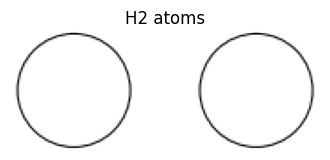

In [6]:
view_ase_atoms(atoms, figsize=(4, 4), title="H2 atoms", scale=100)

Instead of elemental symbols `symbols`, atomic numbers can be specified as `numbers`.

In [7]:
co_atoms = Atoms(numbers=[6, 8], positions=[[0, 0, 0], [1.0, 0, 0]])
view_x3d(co_atoms)

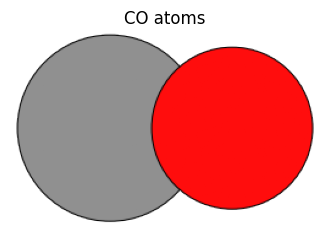

In [8]:
view_ase_atoms(co_atoms, figsize=(4, 4), title="CO atoms", scale=100)

If you want to define a system with periodic boundary conditions, you can specify periodic information in `cell` and turn on or off whether to apply periodic boundary conditions for each of the a-axis, b-axis, and c-axis in `pbc`.

In [9]:
from ase import Atoms


na2_atoms = Atoms(
    symbols="Na2",
    positions=[[0, 0, 0], [2.115, 2.115, 2.115]],
    cell=[4.23, 4.23, 4.23],
    pbc=[True, True, True]
)

In [10]:
view_x3d(na2_atoms)

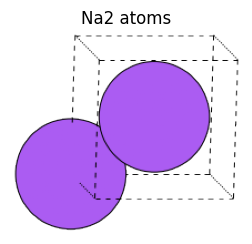

In [11]:
view_ase_atoms(na2_atoms, rotation="10x,10y,0z", figsize=(3, 3), title="Na2 atoms", scale=30)

### Attribute and method in ASE

<figure style="width:200px">
<img src="https://github.com/matlantis/atomistic-simulation-tutorial-colab/blob/main/tutorials/assets/ch1/atoms.png?raw=1"/>
</figure>

The `atoms` holds information about the structure and can be referenced through the attributes and `get_XXX` functions.
Attributes are variables that the `Atoms` class possesses, some of which can be referenced directly as `atoms.xxx`. <br/>

Some information can be accessed through methods.
The following is a summary of the return values (what the shape looks like as a numpy array) of the main attribute and methods.

 - Attribute
   - `symbols`: returns a summary of elemental species and their numbers.
   - `numbers`: array of atomic numbers, shape is (N,).
   - `positions`: the coordinates of each atom, shape is (N, 3) where 3 means xyz coordinates.
   - `cell`: represented by the `Cell` class of ASE.
     - The details of the Cell class are described later. In general, it is represented by a (3, 3) matrix of vectors of the a, b, and c axes respectively, for example in [triclinic crystal](https://en.wikipedia.org/wiki/Triclinic_crystal_system). In some cases like [orthorhombic crystal](https://en.wikipedia.org/wiki/Orthorhombic_crystal_system), cell can be represented by a (3,) shape vector, which represents the length of a, b, and c axes.
   - `pbc`: Indicates whether there is a periodic boundary condition in each direction.
 - Method
   - `get_masses()`: returns the mass of each atom.
   - `get_momenta()`: return the momentum for each atom.
   - `len(atoms)`: returns the number of atoms `N` in the whole `atoms`.

In [12]:
print(f"symbols  : {atoms.symbols}")
print(f"positions: {atoms.positions}")
print(f"cell     : {atoms.cell}")
print(f"pbc      : {atoms.pbc}")

# "Atomic numbers" and "Mass" can be automatically calculated from "Symbol"
print(f"numbers  : {atoms.numbers}")
print(f"massess  : {atoms.get_masses()}")
print(f"momenta  : {atoms.get_momenta()}")
print(f"Numbers of atoms  : {len(atoms)}")

symbols  : H2
positions: [[0. 0. 0.]
 [1. 0. 0.]]
cell     : Cell([0.0, 0.0, 0.0])
pbc      : [False False False]
numbers  : [1 1]
massess  : [1.008 1.008]
momenta  : [[0. 0. 0.]
 [0. 0. 0.]]
Numbers of atoms  : 2


### System of units

In ASE, energy units are often treated in eV (approximately $1.602 \times 10^{-19}$ J) and coordinate systems in Å ($1 \times 10^{-10}$ m). <br/>
The units for force and stress are these composite units: eV/Å for force and eV/Å2 for stress.
The unit for charge is the elementary amount of charge.

 - eV: [Electronvolt](https://en.wikipedia.org/wiki/Electronvolt)
 - Å: [Angstrom](https://en.wikipedia.org/wiki/Angstrom)
 - e: [Elementary charge](https://en.wikipedia.org/wiki/Elementary_charge)

[Tips] Detailed information about each class/method can be displayed by appending ? within Jupyter.

In [13]:
Atoms?